Enter the number of stocks to compare:  3
Enter ticker 1:  AAPL
Enter ticker 2:  RVNL.NS
Enter ticker 3:  TATAMOTORS.NS



General Information DataFrame:
          Ticker                      Name     Market Cap             Sector  \
0           AAPL                Apple Inc.  3580177154048         Technology   
1        RVNL.NS  Rail Vikas Nigam Limited   820038336512        Industrials   
2  TATAMOTORS.NS       Tata Motors Limited  2851579625472  Consumer Cyclical   

                     Industry  
0        Consumer Electronics  
1  Engineering & Construction  
2          Auto Manufacturers  

Valuation Metrics DataFrame:
   Trailing P/E  Forward P/E PEG Ratio  Price-to-Book (P/B)  Enterprise Value  \
0     38.891624    28.520203       N/A            62.874970     3634070552576   
1     60.976746    49.471700       N/A             9.299850      828030124032   
2      8.606266    10.767992       N/A             2.636254     3301254103040   

   EV/EBITDA  
0     26.987  
1     70.767  
2      6.794  

Profitability Metrics DataFrame:
   Gross Margins  Operating Margins  Net Margins  Return on Assets (RO

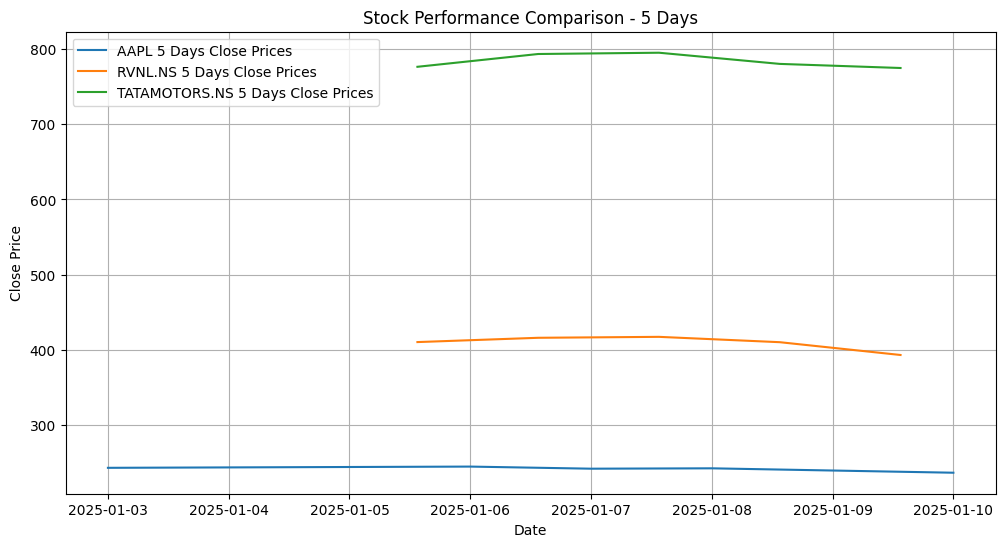

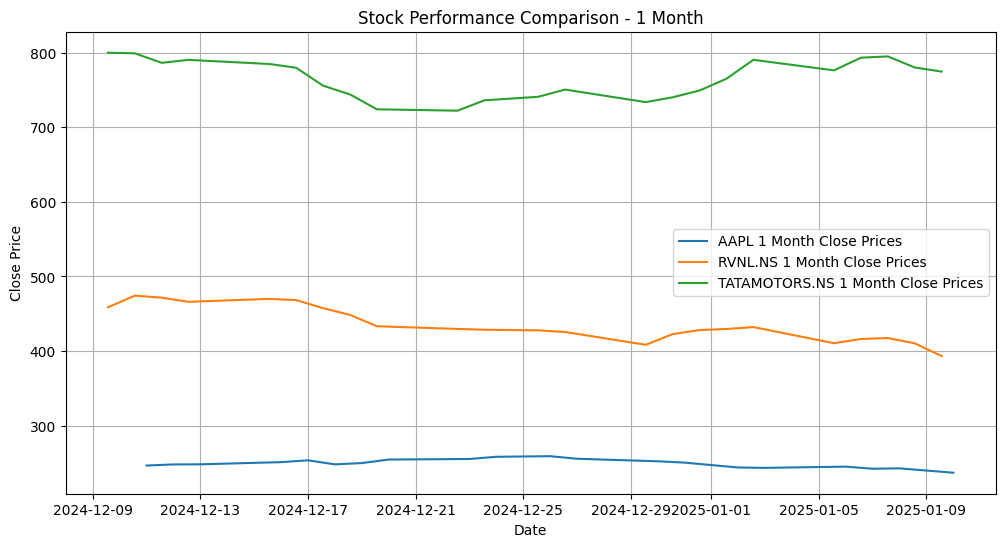

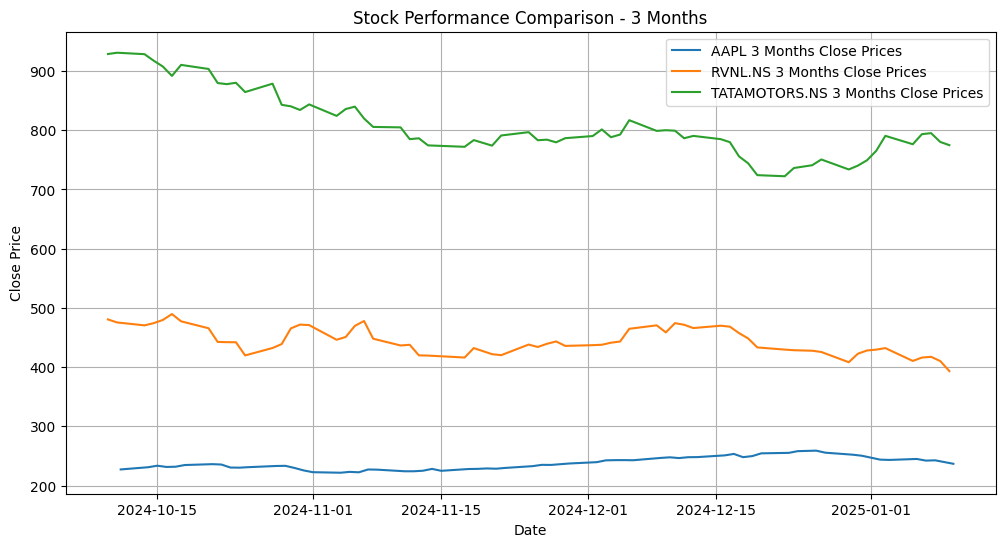

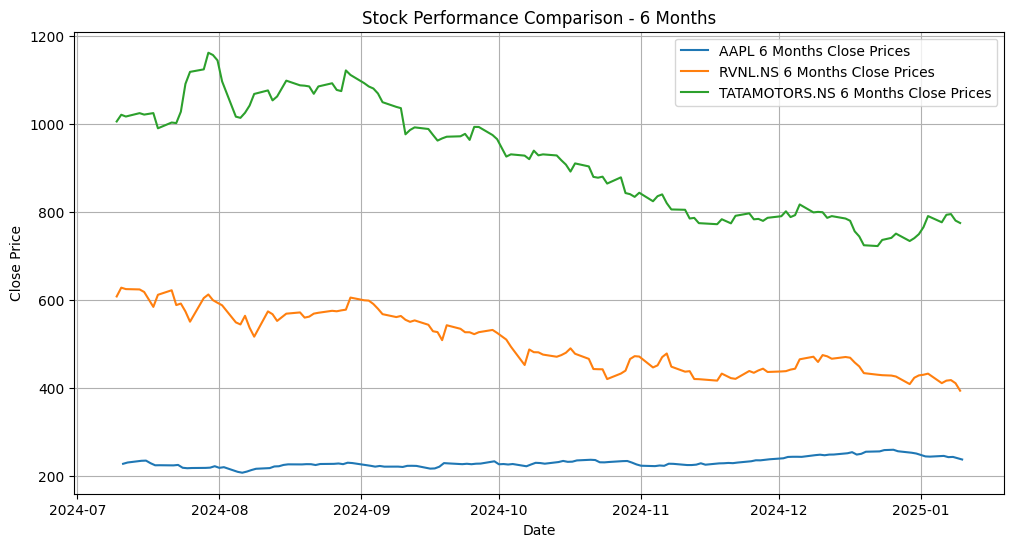

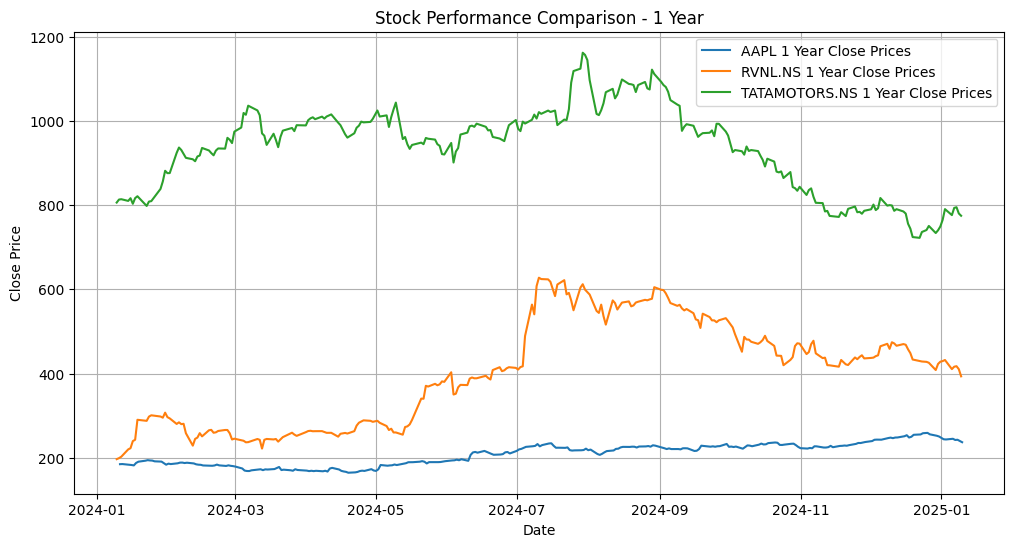

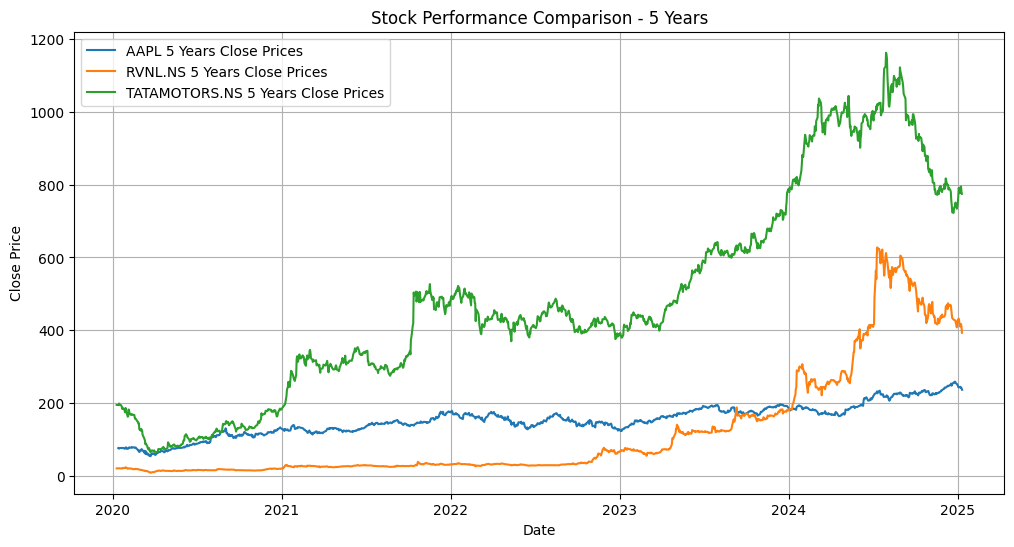

In [1]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

def get_stock_data(ticker):
    try:
        stock = yf.Ticker(ticker)
        info = stock.info

        # General Stock Information
        general_info = {
            "Ticker": ticker,
            "Name": info.get("longName", "N/A"),
            "Market Cap": info.get("marketCap", "N/A"),
            "Sector": info.get("sector", "N/A"),
            "Industry": info.get("industry", "N/A"),
        }

        # Valuation Metrics
        valuation_metrics = {
            "Trailing P/E": info.get("trailingPE", "N/A"),
            "Forward P/E": info.get("forwardPE", "N/A"),
            "PEG Ratio": info.get("pegRatio", "N/A"),
            "Price-to-Book (P/B)": info.get("priceToBook", "N/A"),
            "Enterprise Value": info.get("enterpriseValue", "N/A"),
            "EV/EBITDA": info.get("enterpriseToEbitda", "N/A"),
        }

        # Profitability Metrics
        profitability_metrics = {
            "Gross Margins": info.get("grossMargins", "N/A"),
            "Operating Margins": info.get("operatingMargins", "N/A"),
            "Net Margins": info.get("profitMargins", "N/A"),
            "Return on Assets (ROA)": info.get("returnOnAssets", "N/A"),
            "Return on Equity (ROE)": info.get("returnOnEquity", "N/A"),
        }

        # Growth Metrics
        growth_metrics = {
            "Revenue Growth (YoY)": info.get("revenueGrowth", "N/A"),
            "Earnings Growth (YoY)": info.get("earningsGrowth", "N/A"),
            "Free Cash Flow (FCF)": info.get("freeCashflow", "N/A"),
            "EBITDA Growth": info.get("ebitdaMargins", "N/A"),
        }

        # Dividend Metrics
        dividend_metrics = {
            "Dividend Yield": info.get("dividendYield", "N/A"),
            "Dividend Payout Ratio": info.get("payoutRatio", "N/A"),
            "Forward Dividend": info.get("dividendRate", "N/A"),
            "Ex-Dividend Date": info.get("exDividendDate", "N/A"),
        }

        # Financial Health Metrics
        financial_health_metrics = {
            "Current Ratio": info.get("currentRatio", "N/A"),
            "Quick Ratio": info.get("quickRatio", "N/A"),
            "Debt-to-Equity (D/E)": info.get("debtToEquity", "N/A"),
            "Interest Coverage Ratio": info.get("interestCoverage", "N/A"),
        }

        # Performance Metrics
        performance_metrics = {
            "Beta": info.get("beta", "N/A"),
            "52-Week High": info.get("fiftyTwoWeekHigh", "N/A"),
            "52-Week Low": info.get("fiftyTwoWeekLow", "N/A"),
            "Average Volume": info.get("averageVolume", "N/A"),
        }

        # Historical Data
        hist = stock.history(period="5y")
        historical_data = hist if not hist.empty else None

        # Technical Metrics
        technical_metrics = {
            "50-Day Moving Avg": info.get("fiftyDayAverage", "N/A"),
            "200-Day Moving Avg": info.get("twoHundredDayAverage", "N/A"),
        }

        # Compile all data into structured dictionaries
        stock_data = {
            "General Information": general_info,
            "Valuation Metrics": valuation_metrics,
            "Profitability Metrics": profitability_metrics,
            "Growth Metrics": growth_metrics,
            "Dividend Metrics": dividend_metrics,
            "Financial Health Metrics": financial_health_metrics,
            "Performance Metrics": performance_metrics,
            "Technical Metrics": technical_metrics,
        }

        return stock_data, historical_data

    except Exception as e:
        print(f"Error fetching data for {ticker}: {e}")
        return None, None


def plot_comparative_graphs(hist_data, tickers):
    periods = {
        "5 Days": "5d",
        "1 Month": "1mo",
        "3 Months": "3mo",
        "6 Months": "6mo",
        "1 Year": "1y",
        "5 Years": "5y",
    }

    for period, period_code in periods.items():
        plt.figure(figsize=(12, 6))
        for ticker in tickers:
            try:
                data = yf.Ticker(ticker).history(period=period_code)
                plt.plot(data['Close'], label=f'{ticker} {period} Close Prices')
            except Exception as e:
                print(f"Could not plot {ticker} for {period}: {e}")
        plt.title(f"Stock Performance Comparison - {period}")
        plt.xlabel("Date")
        plt.ylabel("Close Price")
        plt.legend()
        plt.grid()
        plt.show()


# Run the script
num_stocks = int(input("Enter the number of stocks to compare: "))
tickers = [input(f"Enter ticker {i+1}: ").upper() for i in range(num_stocks)]

# Initialize dictionaries to hold data
category_dataframes = {
    "General Information": [],
    "Valuation Metrics": [],
    "Profitability Metrics": [],
    "Growth Metrics": [],
    "Dividend Metrics": [],
    "Financial Health Metrics": [],
    "Performance Metrics": [],
    "Technical Metrics": [],
}

# Historical data for plotting
hist_data = {}

# Collect data for all tickers
for ticker in tickers:
    stock_data, hist = get_stock_data(ticker)
    if stock_data:
        for category, data in stock_data.items():
            category_dataframes[category].append(data)
        if hist is not None:
            hist_data[ticker] = hist

# Convert each category into a DataFrame and display
for category, data_list in category_dataframes.items():
    df = pd.DataFrame(data_list)
    print(f"\n{category} DataFrame:")
    print(df)

# Plot comparative graphs
plot_comparative_graphs(hist_data, tickers)
